In [1]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics, tree 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [2]:
dataset = datasets.load_digits()

In [3]:
X = dataset.data
y = dataset.target

## Создаём DecisionTreeClassifier с настройками по умолчанию и измеряем качество его работы с помощью cross_val_score

In [4]:
clf = tree.DecisionTreeClassifier()
metric = cross_val_score(clf, X, y, cv = 10)
print(metric.mean())

0.8369956994492844


## Воспользуемся BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Параметры по умолчанию, задаем только количество дерьев равным 100

In [6]:
clf_bagging = BaggingClassifier(tree.DecisionTreeClassifier(),  n_estimators = 100)

In [16]:
metric_bagging = cross_val_score(clf_bagging, X, y, cv = 10)
print(metric_bagging.mean())

0.9271583710950997


## Каждый базовый алгоритм будет обучаться на $\sqrt{d}$ случайных признаках

In [18]:
d = int((X.shape[1])**0.5)
clf_bagging_random = BaggingClassifier(tree.DecisionTreeClassifier(),  n_estimators = 100, max_features=d)

In [19]:
metric_bagging_random = cross_val_score(clf_bagging_random, X, y, cv = 10)
print(metric_bagging_random.mean())

0.9304489292312054


## Случайные признаки на каждую вершину дерева

In [24]:
clf_bagging_random_DTC = BaggingClassifier(tree.DecisionTreeClassifier(max_features=d),  n_estimators = 200)

In [25]:
metric_bagging_random_DTC = cross_val_score(clf_bagging_random_DTC, X, y, cv = 10)

In [26]:
print(metric_bagging_random_DTC.mean())

0.9539309186052094


### График качества от количества дерьев

In [29]:
import matplotlib.pyplot as plt

In [45]:
cross_val_score_array = []
for i in range(1, 40):
    clf_bagging_random_DTC = BaggingClassifier(tree.DecisionTreeClassifier(max_features=d),  n_estimators = i)
    cross_val_score_array.append(cross_val_score(clf_bagging_random_DTC, X, y, cv = 10).mean())

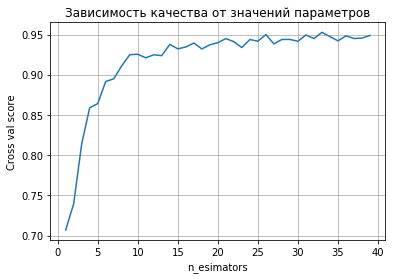

In [46]:
plt.title('Зависимость качества от значений параметров')
plt.grid()
plt.xlabel("n_esimators")
plt.ylabel("Сross val score")
plt.plot(range(1, 40), cross_val_score_array)
plt.show()

## Сравнение с RandomForestClassifier

In [176]:
clf_forest = RandomForestClassifier(n_estimators = 100)

In [177]:
metric_forest = cross_val_score(clf_forest, X, y, cv = 10)

In [178]:
print(metric_forest.mean())

0.9505387039182314


### При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев.

### С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

### При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

### При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без  ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).
